In [12]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [13]:
!pip install deepface

     |████████████████████████████████| 61kB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 16.6MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=9fbbbc326eb9004e94ef8e7bbf902cf4319f14c08537a703e440e8d2351e7f69
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [14]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display




import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [15]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [16]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

In [17]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	


In [18]:
import time
from os import path
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace, DeepID, DlibWrapper, ArcFace, Boosting
from deepface.commons import functions, realtime, distance as dst
from keras.preprocessing import image as image_keras_preprocessing

#################

def postProcesssing(img, grayscale=False,target_size=(160,160)):
  #post-processing
  if grayscale == True:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img, target_size)
  #TODO: resize causes transformation on base image, you should add black pixels to rezie it to target_size

  img_pixels = image_keras_preprocessing.img_to_array(img)
  img_pixels = np.expand_dims(img_pixels, axis = 0)
  img_pixels /= 255 #normalize input in [0, 1]
  return img_pixels


def getFaceImages(images, listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  #detect face in all images
  FRimages=list()
  for image in images: 
    managed_to_find_face=False
    for detector_backend in listWithFaceDetectors:
      try:
          img, region = functions.detect_face(img = image, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection, align = align)
          #--------------------------
          if img.shape[0] == 0 or img.shape[1] == 0:
            if enforce_detection == True:
              raise ValueError("Detected face shape is ", img.shape,". Consider to set enforce_detection argument to False.")
            else: #restore base image
              img = base_img.copy()
          #--------------------------

        #   img = functions.preprocess_face(img = image
        # , target_size=(input_shape_y, input_shape_x)
        # , enforce_detection = enforce_detection
        # , detector_backend = detector_backend
        # , align = align)
          managed_to_find_face=True
          FRimages.append(img)
          break;
      except ValueError: 
        continue
    if(managed_to_find_face==False):
      print("I COUNT NOT FIND THE FACE!!!!!")
      plt.imshow(image)
  return FRimages

def getSizeOfEmbedings(tempImage,model_list):
  sizeOfFinalinput=0;
  tempImage=FRimages[0]
  for model in model_list:
    input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
    img= postProcesssing(tempImage, grayscale=False,target_size=(input_shape_y, input_shape_x))
    curentEmbedings = model.predict(img)[0].tolist()
    sizeOfFinalinput= sizeOfFinalinput+ len(curentEmbedings)
  return sizeOfFinalinput

def getEmbedings(FRimages,sizeOfFinalInput):
  inputSize=(len(FRimages), sizeOfFinalInput)
  embedings=np.empty(inputSize)
  for index, image in enumerate(FRimages):
    image_embedgins= list()
    for model in model_list:
      try:
        input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
        img= postProcesssing(image, grayscale=False,target_size=(input_shape_y, input_shape_x))
        curentEmbedings = model.predict(img)[0].tolist()
        image_embedgins.extend(curentEmbedings)
      except:
        print("i couldnt get embedings")
        plt.imshow(image)
    npEmbedings=np.asarray(image_embedgins)
    print(npEmbedings.shape)
    embedings[index]=npEmbedings
  return embedings


def myRepresent(images,model_list , listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  """
  This function represents facial images as vectors.
  Parameters:
    img_path: exact image path, numpy array or based64 encoded images could be passed.
    model_name (string): VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace.
    model: Built deepface model. A face recognition model is built every call of verify function. You can pass pre-built face recognition model optionally if you will call verify function several times. Consider to pass model if you are going to call represent function in a for loop.
      model = DeepFace.build_model('VGG-Face')
    enforce_detection (boolean): If any face could not be detected in an image, then verify function will return exception. Set this to False not to have this exception. This might be convenient for low resolution images.
    detector_backend (string): set face detector backend as retinaface, mtcnn, opencv, ssd or dlib
  Returns:
    Represent function returns a multidimensional vector. The number of dimensions is changing based on the reference model. E.g. FaceNet returns 128 dimensional vector; VGG-Face returns 2622 dimensional vector.
  """

  #detect face in all images
  FRimages=getFaceImages(images=images, listWithFaceDetectors=listWithFaceDetectors, grayscale=grayscale, enforce_detection = enforce_detection, align = align)


  tempImage=FRimages[0]
  sizeOfFinalinput=getSizeOfEmbedings(tempImage,model_list)
  print("sizeOfFinalinput "+str(sizeOfFinalinput) )

  embedings=getEmbedings(FRimages,sizeOfFinalInput=sizeOfFinalinput)
  return embedings


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [19]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	


In [20]:
def scaling(x, scale):
	return x * scale

def InceptionResNetV2():
	
	inputs = Input(shape=(160, 160, 3))
	x = Conv2D(32, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_1a_3x3') (inputs)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_1a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_1a_3x3_Activation')(x)
	x = Conv2D(32, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_2a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2a_3x3_Activation')(x)
	x = Conv2D(64, 3, strides=1, padding='same', use_bias=False, name= 'Conv2d_2b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2b_3x3_Activation')(x)
	x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
	x = Conv2D(80, 1, strides=1, padding='valid', use_bias=False, name= 'Conv2d_3b_1x1') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_3b_1x1_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_3b_1x1_Activation')(x)
	x = Conv2D(192, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_4a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4a_3x3_Activation')(x)
	x = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_4b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4b_3x3_Activation')(x)
	
	# 5x Block35 (Inception-ResNet-A block):
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_1_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_1_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_2_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_2_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_3_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_3_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_4_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_4_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_5_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_5_Activation')(x)

	# Mixed 6a (Reduction-A block):
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_0_Conv2d_1a_3x3') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_6a_Branch_2_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_pool]
	x = Concatenate(axis=3, name='Mixed_6a')(branches)

	# 10x Block17 (Inception-ResNet-B block):
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_1_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_1_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_2_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_2_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_3_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_3_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_4_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_4_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_5_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_5_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_6_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_6_Activation')(x)	
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_7_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_7_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_7_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_7_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_8_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_8_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_8_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_8_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_9_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_9_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_9_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_9_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_10_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_10_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_10_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_10_Activation')(x)

	# Mixed 7a (Reduction-B block): 8 x 8 x 2080	
	branch_0 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_0a_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation')(branch_0)
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_1a_3x3') (branch_0)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_2 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_1a_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation')(branch_2)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_7a_Branch_3_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_2, branch_pool]
	x = Concatenate(axis=3, name='Mixed_7a')(branches)

	# 5x Block8 (Inception-ResNet-C block):
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_1_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_1_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_2_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_2_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_3_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_3_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_4_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_4_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_5_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_5_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_6_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 1})(up)
	x = add([x, up])
	
	# Classification block
	x = GlobalAveragePooling2D(name='AvgPool')(x)
	x = Dropout(1.0 - 0.8, name='Dropout')(x)
	# Bottleneck
	x = Dense(128, use_bias=False, name='Bottleneck')(x)
	x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False, name='Bottleneck_BatchNorm')(x)

	# Create model
	model = Model(inputs, x, name='inception_resnet_v1')

	return model



#---------------------------------------

def vggbaseModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	return model



#---------------------------------------

def openFaceModel():
  myInput = Input(shape=(96, 96, 3))

  x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
  x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_1')(x)
  x = Conv2D(64, (1, 1), name='conv2')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = Conv2D(192, (3, 3), name='conv3')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
  x = Activation('relu')(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_2')(x) #x is equal added
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)

  # Inception3a
  inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
  inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
  inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

  inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
  inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
  inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

  inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
  inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
  inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
  inception_3a_pool = Activation('relu')(inception_3a_pool)
  inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

  inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
  inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
  inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

  inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

  # Inception3b
  inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
  inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
  inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

  inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
  inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
  inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

  inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
  inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
  inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
  inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
  inception_3b_pool = Activation('relu')(inception_3b_pool)
  inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

  inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
  inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
  inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

  inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

  # Inception3c
  inception_3c_3x3 = Conv2D(128, (1, 1), strides=(1, 1), name='inception_3c_3x3_conv1')(inception_3b)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
  inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
  inception_3c_3x3 = Conv2D(256, (3, 3), strides=(2, 2), name='inception_3c_3x3_conv'+'2')(inception_3c_3x3)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn'+'2')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)

  inception_3c_5x5 = Conv2D(32, (1, 1), strides=(1, 1), name='inception_3c_5x5_conv1')(inception_3b)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
  inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
  inception_3c_5x5 = Conv2D(64, (5, 5), strides=(2, 2), name='inception_3c_5x5_conv'+'2')(inception_3c_5x5)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn'+'2')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)

  inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
  inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

  inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

  #inception 4a
  inception_4a_3x3 = Conv2D(96, (1, 1), strides=(1, 1), name='inception_4a_3x3_conv'+'1')(inception_3c)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'1')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
  inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
  inception_4a_3x3 = Conv2D(192, (3, 3), strides=(1, 1), name='inception_4a_3x3_conv'+'2')(inception_4a_3x3)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'2')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

  inception_4a_5x5 = Conv2D(32, (1,1), strides=(1,1), name='inception_4a_5x5_conv1')(inception_3c)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
  inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
  inception_4a_5x5 = Conv2D(64, (5,5), strides=(1,1), name='inception_4a_5x5_conv'+'2')(inception_4a_5x5)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn'+'2')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)

  inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
  inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)

  inception_4a_pool = Conv2D(128, (1,1), strides=(1,1), name='inception_4a_pool_conv'+'')(inception_4a_pool)
  inception_4a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_pool_bn'+'')(inception_4a_pool)
  inception_4a_pool = Activation('relu')(inception_4a_pool)
  inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)

  inception_4a_1x1 = Conv2D(256, (1, 1), strides=(1, 1), name='inception_4a_1x1_conv'+'')(inception_3c)
  inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn'+'')(inception_4a_1x1)
  inception_4a_1x1 = Activation('relu')(inception_4a_1x1)

  inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

  #inception4e
  inception_4e_3x3 = Conv2D(160, (1,1), strides=(1,1), name='inception_4e_3x3_conv'+'1')(inception_4a)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'1')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
  inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
  inception_4e_3x3 = Conv2D(256, (3,3), strides=(2,2), name='inception_4e_3x3_conv'+'2')(inception_4e_3x3)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'2')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

  inception_4e_5x5 = Conv2D(64, (1,1), strides=(1,1), name='inception_4e_5x5_conv'+'1')(inception_4a)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'1')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
  inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
  inception_4e_5x5 = Conv2D(128, (5,5), strides=(2,2), name='inception_4e_5x5_conv'+'2')(inception_4e_5x5)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'2')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)

  inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
  inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

  inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

  #inception5a
  inception_5a_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_3x3_conv'+'1')(inception_4e)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'1')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
  inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
  inception_5a_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5a_3x3_conv'+'2')(inception_5a_3x3)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'2')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)

  inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
  inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)

  inception_5a_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_pool_conv'+'')(inception_5a_pool)
  inception_5a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_pool_bn'+'')(inception_5a_pool)
  inception_5a_pool = Activation('relu')(inception_5a_pool)
  inception_5a_pool = ZeroPadding2D(padding=(1,1))(inception_5a_pool)

  inception_5a_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5a_1x1_conv'+'')(inception_4e)
  inception_5a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_1x1_bn'+'')(inception_5a_1x1)
  inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

  inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

  #inception_5b
  inception_5b_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_3x3_conv'+'1')(inception_5a)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'1')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
  inception_5b_3x3 = ZeroPadding2D(padding=(1,1))(inception_5b_3x3)
  inception_5b_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5b_3x3_conv'+'2')(inception_5b_3x3)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'2')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)

  inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)

  inception_5b_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_pool_conv'+'')(inception_5b_pool)
  inception_5b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_pool_bn'+'')(inception_5b_pool)
  inception_5b_pool = Activation('relu')(inception_5b_pool)

  inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

  inception_5b_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5b_1x1_conv'+'')(inception_5a)
  inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn'+'')(inception_5b_1x1)
  inception_5b_1x1 = Activation('relu')(inception_5b_1x1)

  inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

  av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
  reshape_layer = Flatten()(av_pool)
  dense_layer = Dense(128, name='dense_layer')(reshape_layer)
  norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

  # Final Model
  model = Model(inputs=[myInput], outputs=norm_layer)
  return model


def deepFaceModel():
  base_model = Sequential()
  base_model.add(Convolution2D(32, (11, 11), activation='relu', name='C1', input_shape=(152, 152, 3)))
  base_model.add(MaxPooling2D(pool_size=3, strides=2, padding='same', name='M2'))
  base_model.add(Convolution2D(16, (9, 9), activation='relu', name='C3'))
  base_model.add(LocallyConnected2D(16, (9, 9), activation='relu', name='L4'))
  base_model.add(LocallyConnected2D(16, (7, 7), strides=2, activation='relu', name='L5') )
  base_model.add(LocallyConnected2D(16, (5, 5), activation='relu', name='L6'))
  base_model.add(Flatten(name='F0'))
  base_model.add(Dense(4096, activation='relu', name='F7'))
  base_model.add(Dropout(rate=0.5, name='D0'))
  base_model.add(Dense(8631, activation='softmax', name='F8'))
  return base_model
	
	#---------------------------------
def deepIDModel():
  myInput = Input(shape=(55, 47, 3))

  x = Conv2D(20, (4, 4), name='Conv1', activation='relu', input_shape=(55, 47, 3))(myInput)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool1')(x)
  x = Dropout(rate=0.99, name='D1')(x)

  x = Conv2D(40, (3, 3), name='Conv2', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool2')(x)
  x = Dropout(rate=0.99, name='D2')(x)

  x = Conv2D(60, (3, 3), name='Conv3', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool3')(x)
  x = Dropout(rate=0.99, name='D3')(x)

  x1 = Flatten()(x)
  fc11 = Dense(160, name = 'fc11')(x1)

  x2 = Conv2D(80, (2, 2), name='Conv4', activation='relu')(x)
  x2 = Flatten()(x2)
  fc12 = Dense(160, name = 'fc12')(x2)

  y = Add()([fc11, fc12])
  y = Activation('relu', name = 'deepid')(y)

  model = Model(inputs=[myInput], outputs=y)
  return model

	
def ResNet34():

  img_input = tensorflow.keras.layers.Input(shape=(112, 112, 3))

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name='conv1_pad')(img_input)
  x = tensorflow.keras.layers.Conv2D(64, 3, strides=1, use_bias=False, kernel_initializer='glorot_normal', name='conv1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=3, epsilon=2e-5, momentum=0.9, name='conv1_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name='conv1_prelu')(x)
  x = stack_fn(x)

  model = training.Model(img_input, x, name='ResNet34')

  return model



def block1(x, filters, kernel_size=3, stride=1, conv_shortcut=True, name=None):
  bn_axis = 3

  if conv_shortcut:
    shortcut = tensorflow.keras.layers.Conv2D(filters, 1, strides=stride, use_bias=False, kernel_initializer='glorot_normal', name=name + '_0_conv')(x)
    shortcut = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_0_bn')(shortcut)
  else:
    shortcut = x

  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_1_bn')(x)
  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_1_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, 3, strides=1, kernel_initializer='glorot_normal', use_bias=False, name=name + '_1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_2_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name=name + '_1_prelu')(x)

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_2_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=stride, kernel_initializer='glorot_normal', use_bias=False, name=name + '_2_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_3_bn')(x)

  x = tensorflow.keras.layers.Add(name=name + '_add')([shortcut, x])
  return x

def stack1(x, filters, blocks, stride1=2, name=None):
  x = block1(x, filters, stride=stride1, name=name + '_block1')
  for i in range(2, blocks + 1):
    x = block1(x, filters, conv_shortcut=False, name=name + '_block' + str(i))
  return x

def stack_fn(x):
  x = stack1(x, 64, 3, name='conv2')
  x = stack1(x, 128, 4, name='conv3')
  x = stack1(x, 256, 6, name='conv4')
  return stack1(x, 512, 3, name='conv5')

def arcFaceModel():
  base_model = ResNet34()
  inputs = base_model.inputs[0]
  arcface_model = base_model.outputs[0]
  arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
  arcface_model = keras.layers.Dropout(0.4)(arcface_model)
  arcface_model = keras.layers.Flatten()(arcface_model)
  arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
  embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
  model = keras.models.Model(inputs, embedding, name=base_model.name)
  return model





In [21]:
def putResizeLayerInModel(model, actualInputShape=(160, 160, 3)):
  input_size=functions.find_input_shape(model)

  toBeModel=tf.keras.Sequential()
  toBeModel.add(Input(shape=actualInputShape))
  toBeModel.add(tf.keras.layers.experimental.preprocessing.Resizing(height=input_size[0],
                                                                width=input_size[1]))
  toBeModel.add(model)
  return toBeModel

def loadAModel(basemodel,nameOfWheights):
  home = "/content/drive/MyDrive/Models_Herodotou/"
  model = basemodel
  output = home+nameOfWheights
  model.load_weights(output)
  return model


def loadFaceNetModel(useResizeLayerInModel=False):
  model=loadAModel(basemodel=InceptionResNetV2(),nameOfWheights='facenet_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadVGGFaceModel(useResizeLayerInModel=False):
  model = loadAModel(basemodel=vggbaseModel(),nameOfWheights='vgg_face_weights.h5')
  model= Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadOpenFaceModel(useResizeLayerInModel=False):
  model=loadAModel(basemodel=openFaceModel(),nameOfWheights='openface_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadDeepFaceModel(useResizeLayerInModel=False):
  base_model=  loadAModel(basemodel=deepFaceModel(),nameOfWheights='VGGFace2_DeepFace_weights_val-0.9034.h5')
  base_model= Model(inputs=base_model.layers[0].input, outputs=base_model.layers[-3].output)
  if(useResizeLayerInModel==True):
    base_model=putResizeLayerInModel(base_model)
  return base_model

def loadDeepIDModel(useResizeLayerInModel=False):
  model= loadAModel(basemodel=deepIDModel(),nameOfWheights='deepid_keras_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadArcFaceModel(useResizeLayerInModel=False):
  model= loadAModel(basemodel=arcFaceModel(),nameOfWheights='arcface_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

In [22]:
!ls

bin	 datalab  home	 lib64	opt   run   sys		       tools
boot	 dev	  lib	 media	proc  sbin  tensorflow-1.15.2  usr
content  etc	  lib32  mnt	root  srv   tmp		       var


In [23]:
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..

/
/
/
/
/
/


In [24]:
facenet= loadFaceNetModel(useResizeLayerInModel=True)
vggface= loadVGGFaceModel(useResizeLayerInModel=True)   #Use this one
openface=loadOpenFaceModel(useResizeLayerInModel=True)
deepface=loadDeepFaceModel(useResizeLayerInModel=True)
deepID=loadDeepIDModel(useResizeLayerInModel=True)      #Use this one
arcFace=loadArcFaceModel(useResizeLayerInModel=True)



In [25]:
facenet.trainable=False;
vggface.trainable=False;
openface.trainable=False;
deepface.trainable=False;
deepID.trainable=False;
arcFace.trainable=False;


# **HERE!**

In [26]:
# listOfDesiredAugmentation=['HF', 'None', 'RO', 'RO-RC', 'HF-RC', 'RO-TR', 'None-RC', 'None-TR', 'HF-TR']
# listOfDesiredAugmentation=['HF', 'None', "RO"]  # Best results so far
listOfDesiredAugmentation=['HF', 'None', 'RO', 'HF-RC', 'None-RC', 'None-TR', 'HF-TR']

# listOfDesiredModelNames=["facenet","vggface","openface", "deepface","deepID", "arcFace"]    #all 
# listOfDesiredModelNames=["facenet","vggface","openface","deepID", "deepface"]                # best performance 
listOfDesiredModelNames=[ "facenet", "deepID", "arcFace" ]                # try minimal stuff  

# **This is the final part. **

In [27]:
# def readEmbedingSingleRow(df, targetColumn):
#   column= list(df[targetColumn])
#   numberOfEmbedings=len(column)
#   sizeOfEmbedings= len(column[0].split(","))
#   sizeOfInput=(numberOfEmbedings,sizeOfEmbedings )
#   toReturn= np.empty(shape=sizeOfInput)
#   for rowIndex, embeding in enumerate(column):
#     embeding=embeding[1:-1]
#     strNumbers=embeding.split(",")
#     for columnIndex, number in enumerate(strNumbers):
#       toReturn[rowIndex][columnIndex]=float(number)
#   return toReturn

def readEmbedingSingleRow(df, targetColumn):
  column= list(df[targetColumn])
  return np.asarray(column)  

In [28]:
def readEmbeding(df, columns):
  listOfEmbedings=list()
  for column in columns:
    listOfEmbedings.append(readEmbedingSingleRow(df=df,targetColumn= column))
  embedings= np.concatenate(listOfEmbedings, axis=1)
  return embedings

  

In [29]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
def returnOneHotEncodedVersion(values):
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return onehot_encoded

In [30]:
temp=[
       'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace', 'cutDeepId',
       'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface', 'deepID',
       'arcFace']

In [31]:
df = pd.read_csv (r'/content/drive/MyDrive/toSaceDF.csv')
test_df=pd.read_csv (r'/content/drive/MyDrive/toSaceDF_test.csv')

In [32]:
for (columnName, columnData) in df[temp].iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.isnull().values.any())

Colunm Name :  cutFaceNet
Column Contents :  False
Colunm Name :  cutvggface
Column Contents :  False
Colunm Name :  cutOpenFace
Column Contents :  False
Colunm Name :  cutDeepFace
Column Contents :  False
Colunm Name :  cutDeepId
Column Contents :  False
Colunm Name :  cutArcFace
Column Contents :  False
Colunm Name :  facenet
Column Contents :  False
Colunm Name :  vggface
Column Contents :  False
Colunm Name :  openface
Column Contents :  False
Colunm Name :  deepface
Column Contents :  False
Colunm Name :  deepID
Column Contents :  False
Colunm Name :  arcFace
Column Contents :  False


In [33]:
for (columnName, columnData) in test_df[temp].iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.isnull().values.any())

Colunm Name :  cutFaceNet
Column Contents :  False
Colunm Name :  cutvggface
Column Contents :  False
Colunm Name :  cutOpenFace
Column Contents :  False
Colunm Name :  cutDeepFace
Column Contents :  False
Colunm Name :  cutDeepId
Column Contents :  False
Colunm Name :  cutArcFace
Column Contents :  False
Colunm Name :  facenet
Column Contents :  False
Colunm Name :  vggface
Column Contents :  False
Colunm Name :  openface
Column Contents :  False
Colunm Name :  deepface
Column Contents :  False
Colunm Name :  deepID
Column Contents :  False
Colunm Name :  arcFace
Column Contents :  False


In [34]:
def turnStrToArray(string):
  string = string.replace("[", "")
  string = string.replace("]", "")
  string=string.split(",")
  embedings=list()
  for strnumber in string:
      embedings.append(float(strnumber))
  return np.asarray(embedings)

In [35]:
def applyFunctionToDataset(dataset, columns, function):
  for index in dataset.index:
    for column in columns:
      temp= function(dataset.loc[index][column]) 
      dataset.at[index,column]=temp 

In [36]:
columnsToChange=['cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace']
len(columnsToChange)

12

In [37]:
applyFunctionToDataset(df, columns=columnsToChange, function=turnStrToArray)
applyFunctionToDataset(test_df, columns=columnsToChange, function=turnStrToArray)

In [38]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
from tensorflow.keras.layers.experimental import preprocessing



In [39]:
from matplotlib.pyplot import *

def plot_loss_regression(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0,2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  draw()
  show()
  
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

In [62]:
def buildEmbedingsClassifier(listOfNodes:list,x_train, init_learning_rate, dropout_posibility,
                             L2_lambda, is_classification=False, name="something"): 
  normalizer = preprocessing.Normalization(axis=-1)
  normalizer.adapt(x_train)

  model = keras.Sequential(name=name )
  model.add( tf.keras.Input(shape=(x_train[0].shape[0],)))
  model.add( normalizer)
  for index, numberOfNodesInLayer in enumerate(listOfNodes):
    if(index!=len(listOfNodes)-1):
      model.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
      model.add(tf.keras.layers.Dropout(dropout_posibility))
    else:
      if(is_classification==False):
        model.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
      else:
        model.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
  return model

In [41]:
def trainWithLearningRateDecay(model, x_train, y_train, x_test, y_test,init_learning_rate=0.001,
                                numberEpochsPerIteration=250,numberOfIterations=6, patience= 10, is_classification= False):
  

  if(is_classification==True):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
  else: 
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)


  all_history={}
  all_history["loss"]=[]
  all_history["val_loss"]=[]
  if (is_classification==True):
    all_history["accuracy"]=[]
    all_history["val_accuracy"]=[]
  
 
  for i in range(1, numberOfIterations+1):
    learning_rate=init_learning_rate/(10^i)
    adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
    numberOfepochs=int(numberEpochsPerIteration*(i/2))
    if (is_classification==False):
        model.compile(
          optimizer=adamOptimizerWithCustomLearningRate,
        loss= tf.keras.losses.MeanAbsolutePercentageError()
        )
    else: 
        model.compile(
        optimizer=adamOptimizerWithCustomLearningRate,
        loss="categorical_crossentropy",
        metrics=['accuracy']
      )
    history= model.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= numberOfepochs,
      callbacks=[callback]
    )
    
    if (is_classification==False):
      all_history["loss"]=all_history["loss"]+ history.history['loss']
      all_history["val_loss"]=all_history["val_loss"]+ history.history['val_loss']
      plot_loss_regression(history)
    else: 
      all_history["accuracy"]=all_history["accuracy"]+ history.history['accuracy']
      all_history["val_accuracy"]=all_history["val_accuracy"]+ history.history['val_accuracy']
      all_history["loss"]=all_history["loss"]+ history.history['loss']
      all_history["val_loss"]=all_history["val_loss"]+ history.history['val_loss']
      plot_accuracy(history)
  return all_history

In [42]:
def trainReggressionModel(x_train, y_train, x_test, y_test, listOfNodes=[16,8,4],
                          init_learning_rate=0.001, dropout_posibility=0.1,L2_lambda=0.0001, 
                          numberEpochsPerIteration=250,numberOfIterations=6,patience= 10, returnModel=True):
  listOfNodes=listOfNodes+[1]
  model = buildEmbedingsClassifier(listOfNodes=listOfNodes, x_train=x_train,
                                      init_learning_rate=init_learning_rate, 
                                      dropout_posibility=dropout_posibility, L2_lambda=L2_lambda)
  history= trainWithLearningRateDecay(model=model, x_train=x_train, y_train=y_train,
                                      x_test=x_test, y_test=y_test,init_learning_rate=init_learning_rate,
                                numberEpochsPerIteration=numberEpochsPerIteration,
                                numberOfIterations=numberOfIterations,
                                patience=patience, is_classification= False)
  if(returnModel==True):
    return model
  else: 
    return history
  

In [43]:
def trainClassificationModel(x_train, y_train, x_test, y_test, numberOfClasses=2,listOfNodes=[16,8,4],
                          init_learning_rate=0.001, dropout_posibility=0.1,L2_lambda=0.0001, 
                          numberEpochsPerIteration=250,numberOfIterations=6,patience=10, returnModel=True):
  listOfNodes=listOfNodes+[numberOfClasses]
  print(listOfNodes)
  model = buildEmbedingsClassifier(listOfNodes=listOfNodes, x_train=x_train,
                                      init_learning_rate=init_learning_rate, 
                                      dropout_posibility=dropout_posibility, L2_lambda=L2_lambda, is_classification= True)
  history= trainWithLearningRateDecay(model=model, x_train=x_train, y_train=y_train,
                                      x_test=x_test, y_test=y_test,init_learning_rate=init_learning_rate,
                                numberEpochsPerIteration=numberEpochsPerIteration,
                                numberOfIterations=numberOfIterations
                                ,patience=patience, is_classification= True)
  if(returnModel==True):
    return model
  else: 
    return history


In [44]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'EthnicitySelf', 'GenderSelf',
       'AgeSelf', 'AgeRated', 'FemaleProb', 'MaleProb', 'AsianProb',
       'ChineseAsianProb', 'JapaneseAsianProb', 'IndianAsianProb',
       'OtherAsianProb', 'MiddleEasternProb', 'BlackProb', 'LatinoProb',
       'MultiProb', 'OtherProb', 'WhiteProb', 'Afraid', 'Angry', 'Attractive',
       'Babyfaced', 'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine',
       'Prototypic', 'Sad', 'Surprised', 'Threatening', 'Trustworthy',
       'Unusual', 'Warm', 'Competent', 'SocialStatus', 'LuminanceMedian',
       'augm_type', 'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace'],
      dtype='object')

In [45]:
def getStratifiedDF(df,targetColumn ):
  #use stratfied samplying
  sizeOfSampleFromEachClass=min(df.groupby(targetColumn).size())
  # sizeOfSampleFromEachClass=10
  stradifiedSampleDF=df.groupby(targetColumn, group_keys=False).apply(lambda x: x.sample(min(len(x), sizeOfSampleFromEachClass)))
  print(stradifiedSampleDF.groupby(targetColumn).size())
  return stradifiedSampleDF
  # stradifiedSampleDF=oringinalDataset

In [46]:
age_train=np.asarray(list(df["AgeRated"]))
age_test=np.asarray(list(test_df["AgeRated"]))

trust_train=np.asarray(list(df["Trustworthy"]))
trust_test=np.asarray(list(test_df["Trustworthy"]))

attractive_train=np.asarray(list(df["Attractive"]))
attractive_test=np.asarray(list(test_df["Attractive"]))

#use stratified samplying: 

df_original=df.copy()
test_df_original=test_df.copy()

# for gender
stratified_gender_df=getStratifiedDF(df,targetColumn="GenderSelf" )
stratified_gender_test_df=getStratifiedDF(test_df,targetColumn="GenderSelf" )

gender_train=returnOneHotEncodedVersion(list(stratified_gender_df["GenderSelf"]))
gender_test=returnOneHotEncodedVersion(list(stratified_gender_test_df["GenderSelf"]))

#for Ethnicity

stratified_ethnicity_df=getStratifiedDF(df_original,targetColumn="EthnicitySelf" )
stratified_ethnicity_test_df=getStratifiedDF(test_df_original,targetColumn="EthnicitySelf" )

ethnicity_train=returnOneHotEncodedVersion(list(stratified_ethnicity_df["EthnicitySelf"]))
ethnicity_test=returnOneHotEncodedVersion(list(stratified_ethnicity_test_df["EthnicitySelf"]))



GenderSelf
F    1584
M    1584
dtype: int64
GenderSelf
F    88
M    88
dtype: int64
EthnicitySelf
A    544
B    544
L    544
W    544
dtype: int64
EthnicitySelf
A    24
B    24
L    24
W    24
dtype: int64


In [ ]:
import itertools    
listOfAllModelNames=["facenet","vggface","deepID"] 
listOfAlCombinations= list()
for length in range(2, len(listOfAllModelNames)+1):
  temp= list(itertools.combinations(listOfAllModelNames, length))
  print(len(temp))
  listOfAlCombinations.extend(temp)

In [ ]:
listOfAlCombinations[0]

In [ ]:
y_train= attractive_train
y_test= attractive_test
timesToRepeat=5
with open("/content/drive/MyDrive/Attractiveness_combination.txt", "w") as file1:
  for combination in listOfAlCombinations:
    for i in range(timesToRepeat):
      x_train= readEmbeding(df,combination)
      x_test= readEmbeding(test_df,combination)

      history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                            listOfNodes=[],
                                init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                                numberEpochsPerIteration=60,numberOfIterations=3)
      file1.write(str(combination)+ "itertion " +str(i) + "first model"+  str(min(history.history.history["val_loss"]))+"\n" )
      print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")

      history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                            listOfNodes=[32, 16, 8],
                                init_learning_rate=0.1, dropout_posibility=0.1,L2_lambda=0.05, 
                                numberEpochsPerIteration=50,numberOfIterations=3)
      file1.write(str(combination)+ "itertion " +str(i) + "second model"+  str(min(history.history.history["val_loss"]))+"\n" )
      print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")

      history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                            listOfNodes=[256, 64, 8],
                                init_learning_rate=0.1, dropout_posibility=0.35,L2_lambda=0.35, 
                                numberEpochsPerIteration=40,numberOfIterations=3)
      file1.write(str(combination)+ "itertion " +str(i) + "third model"+  str(min(history.history.history["val_loss"]))+"\n" )
      print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")


      history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                            listOfNodes=[1024, 256, 64],
                                init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                                numberEpochsPerIteration=30,numberOfIterations=3)
      file1.write(str(modelName)+ "itertion " +str(i) + "fourth model"+  str(min(history.history.history["val_loss"]))+"\n" )
      print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")
# #12.5 ish 
# #12.5 ish 

In [ ]:
modelsNames= ["facenet","vggface","arcFace", "deepID","deepface","openface"]
# modelsNames= ["vggface","arcFace", "deepID","deepface","openface"]

In [ ]:
!ls

In [ ]:
stratified_training_df= stratified_gender_df
stratified_testing_df= stratified_gender_test_df

y_train= gender_train
y_test= gender_test
timesToRepeat=3


with open("/content/drive/MyDrive/gender_2.txt", "w") as file1:
  for modelName in modelsNames:
    for i in range(timesToRepeat):
      x_train= readEmbeding(stratified_training_df,[modelName])
      x_test= readEmbeding(stratified_testing_df,[modelName])

      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0]),
                            listOfNodes=[],
                                init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                                numberEpochsPerIteration=40,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "first model"+  str(max(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,max(history.history.history["val_accuracy"]), "\n\n\n")


      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0]),
                            listOfNodes=[32, 16, 8],
                                init_learning_rate=0.1, dropout_posibility=0.1,L2_lambda=0.0005, 
                                numberEpochsPerIteration=35,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "second model"+  str(max(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,max(history.history.history["val_accuracy"]), "\n\n\n")

      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0]),
                            listOfNodes=[256, 64, 8],
                                init_learning_rate=0.1, dropout_posibility=0.15,L2_lambda=0.001, 
                                numberEpochsPerIteration=30,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "second model"+  str(max(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,max(history.history.history["val_accuracy"]), "\n\n\n")

      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0]),
                            listOfNodes=[1024, 256, 64],
                                init_learning_rate=0.1, dropout_posibility=0.3,L2_lambda=0.002, 
                                numberEpochsPerIteration=25,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "second model"+  str(max(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,max(history.history.history["val_accuracy"]), "\n\n\n")

# #12.5 ish 
# #12.5 ish 

In [ ]:
y_train= attractive_train
y_test= attractive_test
timesToRepeat=3
with open("/content/drive/MyDrive/AttractivnessThing.txt", "w") as file1:
  for modelName in modelsNames:
    for i in range(timesToRepeat):
      x_train= readEmbeding(df,[modelName])
      x_test= readEmbeding(test_df,[modelName])

      # history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
      #                       listOfNodes=[],
      #                           init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
      #                           numberEpochsPerIteration=40,numberOfIterations=3)
      # file1.write(modelName+ "itertion " +str(i) + "first model"+  str(min(history.history.history["val_loss"]))+"\n" )
      # print(modelName,min(history.history.history["val_loss"]), "\n\n\n")

      # history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
      #                       listOfNodes=[32, 16, 8],
      #                           init_learning_rate=0.1, dropout_posibility=0.1,L2_lambda=0.0001, 
      #                           numberEpochsPerIteration=50,numberOfIterations=3)
      # file1.write(modelName+ "itertion " +str(i) + "second model"+  str(min(history.history.history["val_loss"]))+"\n" )
      # print(modelName,min(history.history.history["val_loss"]), "\n\n\n")

      # history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
      #                       listOfNodes=[256, 64, 8],
      #                           init_learning_rate=0.1, dropout_posibility=0.35,L2_lambda=0.35, 
      #                           numberEpochsPerIteration=40,numberOfIterations=3)
      # file1.write(modelName+ "itertion " +str(i) + "third model"+  str(min(history.history.history["val_loss"]))+"\n" )
      # print(modelName,min(history.history.history["val_loss"]), "\n\n\n")


      history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                            listOfNodes=[1024, 256, 64],
                                init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.0005, 
                                numberEpochsPerIteration=30,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "fourth model"+  str(min(history.history.history["val_loss"]))+"\n" )
      print(modelName,min(history.history.history["val_loss"]), "\n\n\n")
# #12.5 ish 
# #12.5 ish 

In [ ]:
import itertools    
listOfAllModelNames=["facenet","vggface","openface", "deepface","deepID", "arcFace"] 
listOfAlCombinations= list()
for length in range(1, len(listOfAllModelNames)+1):
  temp= list(itertools.combinations(listOfAllModelNames, length))
  print(len(temp))
  listOfAlCombinations.extend(temp)

In [ ]:
y_train= age_train
y_test= age_test
with open("age.txt", "w") as file1:
  for combination in possibleCombinations:
    x_train= readEmbeding(df,[combination])
    x_test= readEmbeding(test_df,[combination])

    history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                          listOfNodes=[],
                              init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                              numberEpochsPerIteration=60,numberOfIterations=3)
    file1.write(str(combination)+" "+  str(min(history.history.history["val_loss"]))+"\n" )
    print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")

    history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                          listOfNodes=[32, 16, 8],
                              init_learning_rate=0.1, dropout_posibility=0.1,L2_lambda=0.05, 
                              numberEpochsPerIteration=50,numberOfIterations=3)
    file1.write(str(combination)+" "+  str(min(history.history.history["val_loss"]))+"\n" )
    print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")

    history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                          listOfNodes=[256, 64, 8],
                              init_learning_rate=0.1, dropout_posibility=0.35,L2_lambda=0.35, 
                              numberEpochsPerIteration=40,numberOfIterations=3)
    file1.write(str(combination)+" "+  str(min(history.history.history["val_loss"]))+"\n" )
    print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")


    history= trainReggressionModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,
                          listOfNodes=[1024, 256, 64],
                              init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                              numberEpochsPerIteration=30,numberOfIterations=3)
    file1.write(str(combination)+" "+  str(min(history.history.history["val_loss"]))+"\n" )
    print(str(combination),min(history.history.history["val_loss"]), "\n\n\n")
# #12.5 ish 
# #12.5 ish 

In [ ]:
# L2_lambda=0.01
# dropout_posibility=0.2

# y_train= gender_train
# y_test= gender_test

# x_train= readEmbeding(df,["facenet"])
# x_test= readEmbeding(test_df,["facenet"])

# normalizer = preprocessing.Normalization(axis=-1)
# normalizer.adapt(x_train)

# model = keras.Sequential()
# model.add( tf.keras.Input(shape=(x_train[0].shape[0],)))
# model.add( normalizer)
# model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
# model.add(tf.keras.layers.Dropout(dropout_posibility))
# model.add(tf.keras.layers.Dense(len(y_train[0]),activation='softmax',kernel_initializer=Heinitializer))  



# model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=['accuracy']
#       )

# history= model.fit(
#       x_train,
#       y_train,
#       validation_data=(x_test, y_test),
#     epochs= numberOfepochs
#     )


In [ ]:
trainClassificationModel(x_train=x_train, y_train=ethnicity_train, x_test=x_test, y_test= ethnicity_test,
                         numberOfClasses=4,listOfNodes=[256, 64, 16],
                          init_learning_rate=0.001, dropout_posibility=0.0,L2_lambda=0.0, 
                          numberEpochsPerIteration=20,numberOfIterations=10)

y_train=ethnicity_train
y_test= ethnicity_test
# for modelName in modelsNames:
#   x_train= readEmbeding(df,[modelName])
#   x_test= readEmbeding(test_df,[modelName])
#   print(modelName, "\n\n\n")

#   numberOfClasses=len(ethnicity_train[0])
#   listOfNodes=[]
#   listOfNodes=  listOfNodes+[numberOfClasses]
#   numberOfepochs=100
#   init_learning_rate =0.1
#   dropout_posibility=0
#   L2_lambda=0


#   model = buildEmbedingsClassifier(listOfNodes=listOfNodes, x_train=x_train,
#                                     init_learning_rate=init_learning_rate, 
#                                     dropout_posibility=dropout_posibility, L2_lambda=L2_lambda, is_classification= True)


  
#   learning_rate=init_learning_rate

#   adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)

#   model.compile(
#   optimizer=adamOptimizerWithCustomLearningRate,
#   loss="categorical_crossentropy",
#   metrics=['accuracy']
# )
#   history= model.fit(
#   x_train,
#   y_train,
#   validation_data=(x_test, y_test),
#   epochs= numberOfepochs
#   )

  # trainClassificationModel(x_train=x_train, y_train= ethnicity_train,   x_test=x_test, y_test= ethnicity_test,
  #                       listOfNodes=[],,
  #                           init_learning_rate=0.1, dropout_posibility=0.05,L2_lambda=0.00, 
  #                           numberEpochsPerIteration=40,numberOfIterations=3)
    

In [ ]:
!pip install keras-tuner --upgrade


In [ ]:
history.history

In [ ]:
x_train

In [ ]:
listofAllSingleModels=[
                       [ "facenet"], 
                       ["vggface"],
                       ["openface"], 
                       ["deepface"],
                       ["deepID"],
                       ["arcFace"]
                       ]    #all 


tasks={"AgeRated": "reg", "Trustworthy": "reg", "Attractive": "reg",
       "GenderSelf": "clas","EthnicitySelf": "reg"}

In [ ]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch



In [ ]:
      ###########################################################
      class CNNHyperModel(HyperModel):

        def __init__(self,x_train, is_classification):
          self.x_train=x_train
          self.is_classification= is_classification

        def build(self, hp):
          hyperparameters={
              
              "L2_lambda":hp.Float(
                'L2_lambda',
                min_value=0.001,
                max_value=0.3,
                # default=0.1,
                sampling='LOG',
            ),
              
              "learning_rate": 0.001,

              "dropout_posibility":hp.Float(
                'dropout_posibility',
                min_value=0.01,
                max_value=0.3,
                sampling='LOG',
                # default=0.01,
            ),

            "numberOfNodesInFirstDenseLayer":hp.Choice(
                name='numberOfNodesInFirstDenseLayer',
                values=[16],
            ),

              "numberOfNodesInSecondDenseLayer":hp.Choice(
                name='numberOfNodesInSecondDenseLayer',
                values=[8],
            ),

                "numberOfNodesInThirdDenseLayer":hp.Choice(
                name='numberOfNodesInThirdDenseLayer',
                values=[4],
                # default=6
            )
          }
          listOfNodes=[hyperparameters["numberOfNodesInFirstDenseLayer"],
                      hyperparameters["numberOfNodesInSecondDenseLayer"],
                      hyperparameters["numberOfNodesInThirdDenseLayer"]
                      ]

          model= buildEmbedingsClassifier(listOfNodes=listOfNodes,
                                  x_train= self.x_train,
                                  init_learning_rate=hyperparameters["learning_rate"],
                                  dropout_posibility=hyperparameters["dropout_posibility"],
                                  L2_lambda=hyperparameters["L2_lambda"],
                                  is_classification=self.is_classification
          )
          adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=hyperparameters["learning_rate"])

          if (is_classification==False):
            model.compile(
              optimizer=adamOptimizerWithCustomLearningRate,
            loss= tf.keras.losses.MeanAbsolutePercentageError()
            )
          else: 
            model.compile(
            optimizer=adamOptimizerWithCustomLearningRate,
            loss="categorical_crossentropy",
            metrics=['accuracy']
          )
          return model


In [ ]:
!rm -rf random_search/
!mkdir random_search

In [ ]:
def randomTunerStuff(filename:str, tasks,listOfModelsNames,
                                 numberEpochs=50,max_trials=5,executions_per_trial=2):
  with open(filename, "w") as file_object:
        file_object.write("start of things"+ "\n")
  for task, typeOfTask in tasks.items():
    with open(filename, "a") as file_object:
        file_object.write(task+ "\n")
    dic={}
    for modelsNames in listOfModelsNames:
      print(task,modelsNames, "\n\n" )

      x_train= readEmbeding(df,modelsNames)
      x_test= readEmbeding(test_df,modelsNames)
      if (typeOfTask=="clas"):
        is_classification=True
        objective='val_accuracy'
        y_train=returnOneHotEncodedVersion(list(df[task]))
        y_test=returnOneHotEncodedVersion(list(test_df[task]))
      else:
        is_classification=False
        objective='val_loss'
        y_train=np.asarray(list(df[task]))
        y_test=np.asarray(list(test_df[task]))
      hypermodel = CNNHyperModel(x_train=x_train, is_classification= is_classification)
      tuner = RandomSearch(
                hypermodel,
                objective=objective,
                max_trials=max_trials,
                executions_per_trial=executions_per_trial,
                directory='random_search',
                project_name='Temporary',
                overwrite=True
            )
      print(tuner.search_space_summary())
      tuner.search(x_train, y_train, epochs=numberEpochs,validation_data=(x_test, y_test))
      # Retrieve the best model.
      best_model = tuner.get_best_models(num_models=1)[0]

      if(is_classification==True):
        # Evaluate the best model.
        loss, accuracy = best_model.evaluate(x_test, y_test)
        print( "loss: ",loss,"      accuracy: ",  accuracy)
        with open(filename, "a") as file_object:
          file_object.write("loss: " +str( loss) + "      accuracy: "+   accuracy+"\n")
          file_object.write(str(best_model.get_config()))
      else:
        # Evaluate the best model.
        loss = best_model.evaluate(x_test, y_test)
        print( "loss: ",loss)
        with open(filename, "a") as file_object:
          file_object.write("loss: " +str( loss)+ "\n")
          file_object.write(str(best_model.get_config()))


      
      


In [ ]:
randomTunerStuff(filename="/content/drive/MyDrive/temp",
                             tasks=tasks,
                             listOfModelsNames=listofAllSingleModels,numberEpochs=60,
                            max_trials=5,executions_per_trial=1
                                 )

In [ ]:
!rm -rf random_search/
!mkdir random_search

In [ ]:
# def saveOutputofPreTrainedModels(filename:str,tasks,listOfModelsNames, listOfNodes,
#                                  numberOfRepeated=5, dropout_posibility=0.06,
#                                  L2_lambda=0.0004,init_learning_rate=0.001,
#                                  numberEpochsPerIteration=40, numberOfIterations=6
#                                  ):

def saveOutputofPreTrainedModels(filename:str,tasks,listOfModelsNames, 
                                 numberOfRepeated=5,init_learning_rate=0.001,
                                 numberEpochsPerIteration=40, numberOfIterations=6
                                 ):
  with open(filename, "w") as file_object:
        file_object.write("start of things"+ "\n")
  for task, taskDic in tasks.items():
    with open(filename, "a") as file_object:
        file_object.write(task+ "\n")
    dic={}
    for modelsNames in listOfModelsNames:

      x_train= readEmbeding(df,modelsNames)
      x_test= readEmbeding(test_df,modelsNames)
      if (taskDic["type"]=="clas"):
        y_train=returnOneHotEncodedVersion(list(df[task]))
        y_test=returnOneHotEncodedVersion(list(test_df[task]))
      else:
        y_train=np.asarray(list(df[task]))
        y_test=np.asarray(list(test_df[task]))

      
      normalizer = preprocessing.Normalization(axis=-1)
      normalizer.adapt(x_train)

      dic[str(modelsNames)]={"ModelName": modelsNames , "historyList": list()}

      for i in range(numberOfRepeated):
        if(taskDic["type"]=="clas"):
          current_history= trainClassificationModel(x_train=x_train, y_train=y_train, x_test=x_test, y_test= y_test,
                            numberOfClasses=len(y_train[0]),listOfNodes=taskDic["hyperparameters"]["listOfNodes"],
                              init_learning_rate=init_learning_rate, dropout_posibility=taskDic["hyperparameters"]["dropout_posibility"]
                              ,L2_lambda=taskDic["hyperparameters"]["L2_lambda"],  numberEpochsPerIteration=numberEpochsPerIteration
                              ,numberOfIterations=numberOfIterations)
        else:
          current_history= trainReggressionModel(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test,
                                      listOfNodes=taskDic["hyperparameters"]["listOfNodes"],
                              init_learning_rate=init_learning_rate, dropout_posibility=taskDic["hyperparameters"]["dropout_posibility"]
                              ,L2_lambda=taskDic["hyperparameters"]["L2_lambda"],  numberEpochsPerIteration=numberEpochsPerIteration
                              ,numberOfIterations=numberOfIterations)
        toPutInList={}
        for key, value in current_history.items():
          if(len(value)!=0):
            toPutInList[key]=min(value)

        dic[str(modelsNames)]["historyList"].append(toPutInList)


      # print( str(dic[str(modelsNames)]["ModelName"]) , " bestvalloss ", str(min( dic[str(modelsNames)]["historyList"])))
      # Open a file with access mode 'a'
    with open(filename, "a") as file_object:
          for key, value in dic.items(): 
            file_object.write('%s:%s\n' % (key, value))


In [ ]:
listofAllSingleModels=[
                       [ "facenet"], 
                       ["vggface"],
                       ["openface"], 
                       ["deepface"],
                       ["deepID"],
                       ["arcFace"]
                       ]    #all 

AgeRated={'type': "reg", "hyperparameters":{ 
    "listOfNodes":[],
    "dropout_posibility": 0.06,
    "L2_lambda": 0.0004
}}

Trustworthy={'type': "reg", "hyperparameters":{ 
    "listOfNodes":[],
    "dropout_posibility": 0.06,
    "L2_lambda": 0.0004
}}

Attractive={'type': "reg", "hyperparameters":{ 
    "listOfNodes":[],
    "dropout_posibility": 0.06,
    "L2_lambda": 0.0004
}}
GenderSelf={'type': "reg", "hyperparameters":{ 
    "listOfNodes":[],
    "dropout_posibility": 0.06,
    "L2_lambda": 0.0004
}}
EthnicitySelf={'type': "reg", "hyperparameters":{ 
    "listOfNodes":[],
    "dropout_posibility": 0.06,
    "L2_lambda": 0.0004
}}
tasks={"AgeRated": AgeRated, "Trustworthy": Trustworthy, "Attractive": Attractive,
       "GenderSelf": GenderSelf,"EthnicitySelf": EthnicitySelf}

In [ ]:
saveOutputofPreTrainedModels(filename="/content/drive/MyDrive/temp",
                             tasks=tasks,
                             listOfModelsNames=listofAllSingleModels,
                            numberOfRepeated=3,init_learning_rate=0.04,
                            numberEpochsPerIteration=20, numberOfIterations=8
                                 )

In [ ]:
# from kerastuner import HyperModel

# class CNNHyperModel(HyperModel):

#     def build(self, hp):
#       hyperparameters={ 

#           "L2_lambda":hp.Float(
#             'L2_lambda',
#             min_value=0.0001,
#             max_value=0.1,
#             # default=0.1,
#             sampling='LOG',
#         ),
          
#           "learning_rate":hp.Float(
#             'learning_rate',
#             min_value=0.0001,
#             max_value=0.1,
#             # default=0.2,
#             sampling='LOG',
#         ),


#           "dropout_posibility":hp.Float(
#             'dropout_posibility',
#             min_value=0.001,
#             max_value=0.3,
#             sampling='LOG',
#             # default=0.01,
#         ),

#         "numberOfNodesInFirstDenseLayer":hp.Choice(
#             name='numberOfNodesInFirstDenseLayer',
#             values=[64,32,16],
#         ),

#           "numberOfNodesInSecondDenseLayer":hp.Choice(
#             name='numberOfNodesInSecondDenseLayer',
#             values=[16,8,4],
#         ),

#             "numberOfNodesInThirdDenseLayer":hp.Choice(
#             name='numberOfNodesInThirdDenseLayer',
#             values=[8,4,2],
#             # default=6
#         )

#     "modelName":hp.Choice(
#     name='modelName',
#     values=[
#                     "facenet", "vggface", "openface", "deepface", "deepID","arcFace"
#             ]
#             )
#       }
#       listOfNodes=[hyperparameters["numberOfNodesInFirstDenseLayer"],
#                    hyperparameters["numberOfNodesInSecondDenseLayer"],
#                    hyperparameters["numberOfNodesInThirdDenseLayer"]
#                    ]
#       x_train= readEmbeding(df,[hyperparameters["modelName"]])
#       if(hyperparameters["type"]=="reg"):
#         is_classification=False
#       else: 
#         is_classification=True

#       model= buildEmbedingsClassifier(listOfNodes=listOfNodes,
#                                x_train=x_train, 
#                                init_learning_rate=hyperparameters["learning_rate"],
#                                dropout_posibility=hyperparameters["dropout_posibility"],
#                                L2_lambda=hyperparameters["L2_lambda"],
#                                is_classification=is_classification
#       )
#       adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=hyperparameters["learning_rate"])

#       if (is_classification==False):
#         model.compile(
#           optimizer=adamOptimizerWithCustomLearningRate,
#         loss= tf.keras.losses.MeanAbsolutePercentageError()
#         )
#       else: 
#         model.compile(
#         optimizer=adamOptimizerWithCustomLearningRate,
#         loss="categorical_crossentropy",
#         metrics=['accuracy']
#       )
#       return model



In [ ]:
task="Trustworthy"

x_train= readEmbeding(df,listOfDesiredModelNames)
x_test= readEmbeding(test_df,listOfDesiredModelNames)
# if (taskDic["type"]=="clas"):
#   y_train=returnOneHotEncodedVersion(list(df[task]))
#   y_test=returnOneHotEncodedVersion(list(test_df[task]))
# else:
y_train=np.asarray(list(df[task]))
y_test=np.asarray(list(test_df[task]))

In [ ]:
newModel=trainReggressionModel(x_train, y_train, x_test, y_test, listOfNodes=[256,64,16],
                          init_learning_rate=0.005, dropout_posibility=0.5,L2_lambda=0.3, 
                          numberEpochsPerIteration=20,numberOfIterations=8, returnModel=True)

In [ ]:
inputs = Input(shape=(160, 160, 3))
models=list()
for model in model_list:
  models.append(model(inputs))
branches = models
mixed = Concatenate(axis=1, name='models_Concatenate')(branches)
# pre_classifier= tf.keras.layers.Dense(newModel.input_shape[1])(mixed)
classifier= newModel(mixed)

concatenatedPreTrainedModels = Model(inputs, classifier, name='concatenatedPreTrainedModels')



In [ ]:
mixed.shape

In [ ]:
concatenatedPreTrainedModels.output.shape

In [ ]:
model=concatenatedPreTrainedModels

In [187]:
base_directory = r"/content/drive/MyDrive/AttracivenessRegression/"

def readData(numberOfPictures,dirName):
  sizeOfInput=(numberOfPictures,160,160,3)
  x= np.empty(shape=sizeOfInput,dtype=np.uint8)
  y= np.empty(shape=(numberOfPictures,))
  aug= list()

  directory=base_directory+ dirName+ "/"
  print(directory)
  for index, filename in enumerate(os.listdir(directory)):

    img= cv2.imread(directory+filename)
    try:
      img = img[..., ::-1]
      img=img.astype("uint8")
    except Exception as e: 
      print("FUUUUCK\n"+ filename )
      print(e)
      continue


    rest= filename.split("kostis_")[1]
    rest=rest.split("_")
    aug_type=rest[0]

    label=rest[1] 
    label= float(label.split(".jp")[0])

    x[index]=img
    y[index]=label
    aug.append(aug_type)
  
  return x,y,aug

In [188]:
import os

def findNumberOfItemsInDirectory(directoryPath):

  totalFiles = 0
  totalDir = 0

  for base, dirs, files in os.walk(directoryPath):
      print('Searching in : ',base)
      for Files in files:
          totalFiles += 1

  return totalFiles
  

In [189]:
def readDataFromSingleFolder(dirPath):
  numberOfPictures= findNumberOfItemsInDirectory(dirPath)
  sizeOfInput=(numberOfPictures,160,160,3)
  x= np.empty(shape=sizeOfInput,dtype=np.uint8)
  y= np.empty(shape=(numberOfPictures,))
  aug= list()

  directory=dirPath+ "/"
  print(directory)
  for index, filename in enumerate(os.listdir(directory)):

    img= cv2.imread(directory+filename)
    try:
      img = img[..., ::-1]
      img=img.astype("uint8")
    except Exception as e: 
      print("FUUUUCK\n"+ filename )
      print(e)
      continue


    rest= filename.split("kostis_")[1]
    rest=rest.split("_")
    aug_type=rest[0]

    label=rest[1] 
    label= float(label.split(".jp")[0])

    x[index]=img
    y[index]=label
    aug.append(aug_type)
  
  return x,y,aug

In [191]:
base_directory = r"/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/"
def readFRImages(listOfDesiredAugmentation, directory_plug_in=""):
  totalX=[]
  totalY=[]

  for directory in listOfDesiredAugmentation:
    x,y,aug= readDataFromSingleFolder(base_directory+directory_plug_in+ directory)
    totalX.append(x)
    totalY.append(y)

  images= np.concatenate(totalX, axis=0)
  labels= np.concatenate(totalY, axis=0)

  return images,labels

In [192]:
x_train_fr, y_train_fr=readFRImages(listOfDesiredAugmentation=listOfDesiredAugmentation
                                             ,directory_plug_in="Training/")

Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/RO
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/RO/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None-TR
/cont

In [193]:
x_test_fr , y_test_fr=readFRImages(listOfDesiredAugmentation=listOfDesiredAugmentation
                                             ,directory_plug_in="Test/")

Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/RO
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/RO/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None-TR
/content/drive/MyDrive/TrustworthyRegression/Face

In [ ]:
dropout_posibility=0.5
L2_lambda=0.3

init_learning_rate=0.0000001

numberEpochsPerIteration=2
numberOfIterations=1
for i in range(1, numberOfIterations+1):
  learning_rate=init_learning_rate/(i*10)
  adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(
    optimizer=adamOptimizerWithCustomLearningRate,
  loss= tf.keras.losses.MeanAbsolutePercentageError())

  history= model.fit(
      x_train_fr, y_train_fr, 
    validation_data=(x_test_fr, y_test_fr),
  epochs=numberEpochsPerIteration
  )
  plot_loss(history)

In [ ]:
# model_list=[facenet, vggface, openface, deepface, deepID,arcFace ]

listOfDesiredModelNames=["facenet","deepID", "arcFace"]                # try minimal stuff  
model_list=[facenet, deepID, arcFace ]

In [ ]:
facenet.layers[1].summary()

In [ ]:
facenet.layers[1].layers[-2].name

In [ ]:
facenet.trainable=False;
facenet.layers[1].layers[-2].trainable=True
for l in facenet.layers[1].layers:
    print(l.name, l.trainable)

In [ ]:
newFacenet=createFineTuneModel(facenet.layers[1], lastLayer=2)

In [ ]:
deepID.layers[1].summary()

In [ ]:
print(deepID.layers[1].layers[-3].name)
deepID.layers[1].layers[-4].name

In [ ]:
deepID.trainable=False;
deepID.layers[1].layers[-3].trainable=True
deepID.layers[1].layers[-4].trainable=True
for l in deepID.layers[1].layers:
    print(l.name, l.trainable)

In [ ]:
arcFace.layers[1].summary()

In [ ]:
arcFace.layers[1].layers[-2].name

In [ ]:
arcFace.trainable=False;
arcFace.layers[1].layers[-2].trainable=True
for l in arcFace.layers[1].layers:
    print(l.name, l.trainable)

In [ ]:
vggface.layers[1].summary()

In [ ]:
vggface.layers[1].layers[-1].name

In [ ]:
vggface.trainable=False;
vggface.layers[1].layers[-1].trainable=True
for l in vggface.layers[1].layers:
    print(l.name, l.trainable)

In [ ]:
openface.layers[1].summary()

In [ ]:
openface.layers[1].layers[-2].name

In [ ]:
openface.trainable=False;
openface.layers[1].layers[-2].trainable=True
for l in openface.layers[1].layers:
    print(l.name, l.trainable)

In [ ]:
deepface.layers[1].summary()

In [ ]:
deepface.layers[1].layers[-1].name

In [ ]:
deepface.trainable=False;
deepface.layers[1].layers[-1].trainable=True
for l in deepface.layers[1].layers:
    print(l.name, l.trainable)

In [ ]:
def cutLayersOut(model, numberOfLayersToCut, useResizeLayerInModel=True):
  newModel = tf.keras.Model( inputs= model.layers[0].input, 
  outputs= model.layers[-numberOfLayersToCut].output\
  )
  if(useResizeLayerInModel==True):
    newModel=putResizeLayerInModel(newModel)
  return newModel


In [ ]:
def trainFinalLayers(classifier, pretrainedModel, numberOfLayersToInclude, useResizeLayerInModel=True):
  newModel = tf.keras.Model( inputs= model.layers[numberOfLayersToInclude].input, 
  outputs= classifier.output )
  if(useResizeLayerInModel==True):
    newModel=putResizeLayerInModel(newModel)
  return newModel

In [ ]:
def createFineTuneModel(model, lastLayer,useResizeLayerInModel=True):
  newModel = tf.keras.Model( inputs= model.layers[-lastLayer].output, outputs= model.output )
  if(useResizeLayerInModel==True):
    newModel=putResizeLayerInModel(newModel)
  return newModel

In [ ]:
df["cutFaceNet"][0].shape

In [154]:
age_train=np.asarray(list(df["AgeRated"]))
age_test=np.asarray(list(test_df["AgeRated"]))

trust_train=np.asarray(list(df["Trustworthy"]))
trust_test=np.asarray(list(test_df["Trustworthy"]))

attractive_train=np.asarray(list(df["Attractive"]))
attractive_test=np.asarray(list(test_df["Attractive"]))

#use stratified samplying: 

df_original=df.copy()
test_df_original=test_df.copy()

# for gender
stratified_gender_df=getStratifiedDF(df,targetColumn="GenderSelf" )
stratified_gender_test_df=getStratifiedDF(test_df,targetColumn="GenderSelf" )

gender_train=returnOneHotEncodedVersion(list(stratified_gender_df["GenderSelf"]))
gender_test=returnOneHotEncodedVersion(list(stratified_gender_test_df["GenderSelf"]))

#for Ethnicity

stratified_ethnicity_df=getStratifiedDF(df_original,targetColumn="EthnicitySelf" )
stratified_ethnicity_test_df=getStratifiedDF(test_df_original,targetColumn="EthnicitySelf" )

ethnicity_train=returnOneHotEncodedVersion(list(stratified_ethnicity_df["EthnicitySelf"]))
ethnicity_test=returnOneHotEncodedVersion(list(stratified_ethnicity_test_df["EthnicitySelf"]))



GenderSelf
F    1584
M    1584
dtype: int64
GenderSelf
F    88
M    88
dtype: int64
EthnicitySelf
A    544
B    544
L    544
W    544
dtype: int64
EthnicitySelf
A    24
B    24
L    24
W    24
dtype: int64


In [143]:
facenet= loadFaceNetModel(useResizeLayerInModel=True)
vggface= loadVGGFaceModel(useResizeLayerInModel=True)   #Use this one
# openface=loadOpenFaceModel(useResizeLayerInModel=True)
# deepface=loadDeepFaceModel(useResizeLayerInModel=True)
deepID=loadDeepIDModel(useResizeLayerInModel=True)      #Use this one
# arcFace=loadArcFaceModel(useResizeLayerInModel=True)

In [144]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'EthnicitySelf', 'GenderSelf',
       'AgeSelf', 'AgeRated', 'FemaleProb', 'MaleProb', 'AsianProb',
       'ChineseAsianProb', 'JapaneseAsianProb', 'IndianAsianProb',
       'OtherAsianProb', 'MiddleEasternProb', 'BlackProb', 'LatinoProb',
       'MultiProb', 'OtherProb', 'WhiteProb', 'Afraid', 'Angry', 'Attractive',
       'Babyfaced', 'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine',
       'Prototypic', 'Sad', 'Surprised', 'Threatening', 'Trustworthy',
       'Unusual', 'Warm', 'Competent', 'SocialStatus', 'LuminanceMedian',
       'augm_type', 'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace'],
      dtype='object')

In [145]:
def trainPreTrainedNetworksClassifiers(listOfPreTrainedNetworks,df,test_df, y_train, y_test, is_classification):
  for model in listOfPreTrainedNetworks:
    x_train= readEmbeding(df,[model.name])
    x_test= readEmbeding(test_df,[model.name])

    history= trainWithLearningRateDecay(model, x_train, y_train, x_test, y_test,
                                        init_learning_rate=0.001,
                                numberEpochsPerIteration=30,numberOfIterations=4,
                                  patience= 20, is_classification= is_classification)

In [155]:
y_train= trust_train
y_test= trust_test
is_classification=False


In [147]:
facenetClassifier=buildEmbedingsClassifier(listOfNodes=  [128,16,8],x_train=readEmbeding(df,["facenet"]),  init_learning_rate=0.01,
                                           dropout_posibility=0.1, L2_lambda=0.001, 
                                           is_classification=is_classification,
                                           name="facenet")
# vggClassifier=buildEmbedingsClassifier(listOfNodes=  [128,16,8],x_train=readEmbeding(df,["vggface"]),  init_learning_rate=0.01,
#                                            dropout_posibility=0.1, L2_lambda=0.001, 
#                                            is_classification=is_classification,
#                                            name="vggface")

# facenetClassifier=buildEmbedingsClassifier(listOfNodes=  [128,16,8],x_train=readEmbeding(df,["deepID"]),  init_learning_rate=0.01,
#                                            dropout_posibility=0.1, L2_lambda=0.001, 
#                                            is_classification=is_classification,
#                                            name="deepID")

Epoch 1/15
105/105 [==============================] - 1s 3ms/step - loss: 89.3394 - val_loss: 75.2681
Epoch 2/15
105/105 [==============================] - 0s 2ms/step - loss: 65.0517 - val_loss: 53.1017
Epoch 3/15
105/105 [==============================] - 0s 2ms/step - loss: 49.7686 - val_loss: 41.3443
Epoch 4/15
105/105 [==============================] - 0s 2ms/step - loss: 42.2815 - val_loss: 35.1831
Epoch 5/15
105/105 [==============================] - 0s 2ms/step - loss: 37.6281 - val_loss: 31.1237
Epoch 6/15
105/105 [==============================] - 0s 2ms/step - loss: 34.6851 - val_loss: 27.8579
Epoch 7/15
105/105 [==============================] - 0s 2ms/step - loss: 31.8763 - val_loss: 25.4023
Epoch 8/15
105/105 [==============================] - 0s 2ms/step - loss: 29.7668 - val_loss: 23.1990
Epoch 9/15
105/105 [==============================] - 0s 2ms/step - loss: 27.7447 - val_loss: 21.4031
Epoch 10/15
105/105 [==============================] - 0s 2ms/step - loss: 26.4527

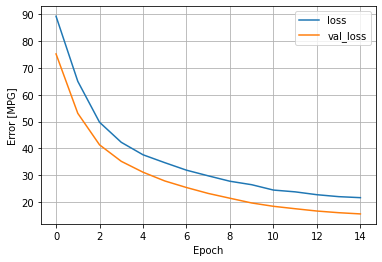

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 21.0816 - val_loss: 15.0418
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 20.0512 - val_loss: 14.4712
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 19.5646 - val_loss: 14.3243
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 19.1305 - val_loss: 14.1826
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 18.5216 - val_loss: 14.0339
Epoch 6/30
105/105 [==============================] - 0s 3ms/step - loss: 17.6747 - val_loss: 13.8882
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 17.9809 - val_loss: 13.5668
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 17.3580 - val_loss: 13.1323
Epoch 9/30
105/105 [==============================] - 0s 2ms/step - loss: 16.9804 - val_loss: 13.4184
Epoch 10/30
105/105 [==============================] - 0s 2ms/step - loss: 16.5756

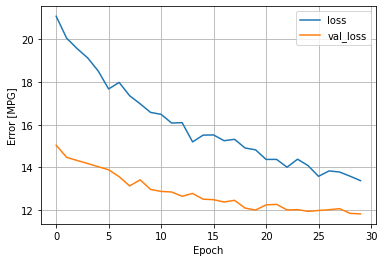

Epoch 1/45
105/105 [==============================] - 1s 3ms/step - loss: 13.2195 - val_loss: 11.9205
Epoch 2/45
105/105 [==============================] - 0s 2ms/step - loss: 12.9347 - val_loss: 11.9297
Epoch 3/45
105/105 [==============================] - 0s 2ms/step - loss: 12.8705 - val_loss: 11.7970
Epoch 4/45
105/105 [==============================] - 0s 2ms/step - loss: 13.1700 - val_loss: 11.7895
Epoch 5/45
105/105 [==============================] - 0s 2ms/step - loss: 12.7847 - val_loss: 11.6965
Epoch 6/45
105/105 [==============================] - 0s 2ms/step - loss: 12.6752 - val_loss: 11.7534
Epoch 7/45
105/105 [==============================] - 0s 2ms/step - loss: 12.8096 - val_loss: 11.7922
Epoch 8/45
105/105 [==============================] - 0s 2ms/step - loss: 12.6804 - val_loss: 11.4873
Epoch 9/45
105/105 [==============================] - 0s 2ms/step - loss: 12.7149 - val_loss: 11.5218
Epoch 10/45
105/105 [==============================] - 0s 2ms/step - loss: 12.5234

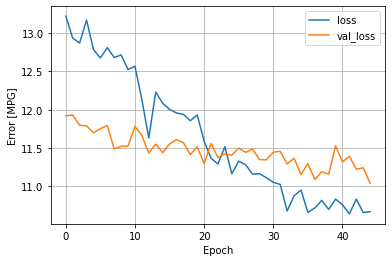

Epoch 1/60
105/105 [==============================] - 1s 4ms/step - loss: 10.3240 - val_loss: 11.2068
Epoch 2/60
105/105 [==============================] - 0s 2ms/step - loss: 10.4114 - val_loss: 11.2886
Epoch 3/60
105/105 [==============================] - 0s 3ms/step - loss: 10.4808 - val_loss: 11.2050
Epoch 4/60
105/105 [==============================] - 0s 2ms/step - loss: 10.3930 - val_loss: 11.2718
Epoch 5/60
105/105 [==============================] - 0s 2ms/step - loss: 10.4461 - val_loss: 11.1814
Epoch 6/60
105/105 [==============================] - 0s 2ms/step - loss: 10.4332 - val_loss: 11.3350
Epoch 7/60
105/105 [==============================] - 0s 2ms/step - loss: 10.2544 - val_loss: 11.2246
Epoch 8/60
105/105 [==============================] - 0s 2ms/step - loss: 10.4163 - val_loss: 11.2426
Epoch 9/60
105/105 [==============================] - 0s 2ms/step - loss: 10.1962 - val_loss: 11.2187
Epoch 10/60
105/105 [==============================] - 0s 3ms/step - loss: 10.1832

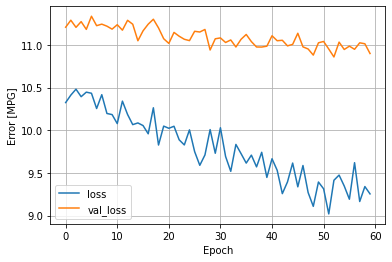

In [148]:
trainPreTrainedNetworksClassifiers(listOfPreTrainedNetworks=[facenetClassifier],
                                   df=df,test_df=test_df, y_train=y_train,
                                   y_test=y_test, is_classification=is_classification)


In [195]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'EthnicitySelf', 'GenderSelf',
       'AgeSelf', 'AgeRated', 'FemaleProb', 'MaleProb', 'AsianProb',
       'ChineseAsianProb', 'JapaneseAsianProb', 'IndianAsianProb',
       'OtherAsianProb', 'MiddleEasternProb', 'BlackProb', 'LatinoProb',
       'MultiProb', 'OtherProb', 'WhiteProb', 'Afraid', 'Angry', 'Attractive',
       'Babyfaced', 'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine',
       'Prototypic', 'Sad', 'Surprised', 'Threatening', 'Trustworthy',
       'Unusual', 'Warm', 'Competent', 'SocialStatus', 'LuminanceMedian',
       'augm_type', 'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace'],
      dtype='object')

In [149]:
barebonesFacenet.output.shape

TensorShape([None, 128])

In [150]:
classifier_pretrained_facenet.input.shape

TensorShape([None, 160])

In [196]:
def createFineTuneFaceNet(classifier_pretrained_facenet, name="cutFaceNet"):
  barebonesFacenet= facenet.layers[1]
  fineTuneFacenet=Sequential(name=name)
  fineTuneFacenet.add(Input(shape=(barebonesFacenet.layers[-2].input.shape[1],)))
  # barebonesFacenet.layers[-2].trainable=False
  fineTuneFacenet.add(barebonesFacenet.layers[-2])
  fineTuneFacenet.add(barebonesFacenet.layers[-1])
  
  fineTuneFacenet.add(classifier_pretrained_facenet)
  fineTuneFacenet.trainable=True
  for l in fineTuneFacenet.layers:
      print(l.name, l.trainable)
  return fineTuneFacenet




In [197]:
fineFacenet=createFineTuneFaceNet(facenetClassifier)

Bottleneck True
Bottleneck_BatchNorm True
facenet True


In [198]:
fineFacenet.name

'cutFaceNet'

In [199]:
x_train= readEmbeding(df,["cutFaceNet"])
x_test= readEmbeding(test_df,["cutFaceNet"])

In [200]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(3336, 1792)
(3336,)
(180, 1792)
(180,)


In [201]:
x_train[0][0]

-0.4272698163986206

In [202]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'EthnicitySelf', 'GenderSelf',
       'AgeSelf', 'AgeRated', 'FemaleProb', 'MaleProb', 'AsianProb',
       'ChineseAsianProb', 'JapaneseAsianProb', 'IndianAsianProb',
       'OtherAsianProb', 'MiddleEasternProb', 'BlackProb', 'LatinoProb',
       'MultiProb', 'OtherProb', 'WhiteProb', 'Afraid', 'Angry', 'Attractive',
       'Babyfaced', 'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine',
       'Prototypic', 'Sad', 'Surprised', 'Threatening', 'Trustworthy',
       'Unusual', 'Warm', 'Competent', 'SocialStatus', 'LuminanceMedian',
       'augm_type', 'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace'],
      dtype='object')

In [208]:
fineTuneFacenet.name

'sequential_22'

In [209]:


callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


fineFacenet.compile(
    optimizer="adam",
  loss= tf.keras.losses.MeanAbsolutePercentageError())

history= fineFacenet.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 100,
    )

Epoch 1/100
105/105 [==============================] - 1s 5ms/step - loss: 11.4854 - val_loss: 12.1816
Epoch 2/100
105/105 [==============================] - 0s 4ms/step - loss: 10.9890 - val_loss: 11.2083
Epoch 3/100
105/105 [==============================] - 0s 5ms/step - loss: 10.8765 - val_loss: 11.4129
Epoch 4/100
105/105 [==============================] - 0s 4ms/step - loss: 10.4561 - val_loss: 12.4715
Epoch 5/100
105/105 [==============================] - 0s 4ms/step - loss: 9.7501 - val_loss: 10.3544
Epoch 6/100
105/105 [==============================] - 0s 4ms/step - loss: 9.7012 - val_loss: 11.1847
Epoch 7/100
105/105 [==============================] - 0s 4ms/step - loss: 9.5878 - val_loss: 11.8911
Epoch 8/100
105/105 [==============================] - 0s 4ms/step - loss: 9.2834 - val_loss: 11.2822
Epoch 9/100
105/105 [==============================] - 0s 4ms/step - loss: 9.3398 - val_loss: 11.0349
Epoch 10/100
105/105 [==============================] - 0s 4ms/step - loss: 9.

In [160]:
fineTuneFacenet.history.history

{'accuracy': [0.9931066036224365,
  0.9917279481887817,
  0.9880514740943909,
  0.9926470518112183,
  0.994025707244873,
  0.990349292755127,
  0.9857536554336548,
  0.9908088445663452,
  0.9931066036224365],
 'loss': [0.0644906684756279,
  0.07366868108510971,
  0.07702488452196121,
  0.0710662454366684,
  0.06413693726062775,
  0.07271014899015427,
  0.09379227459430695,
  0.07402223348617554,
  0.067392498254776],
 'val_accuracy': [0.7708333134651184,
  0.8125,
  0.8125,
  0.8229166865348816,
  0.8020833134651184,
  0.7916666865348816,
  0.8125,
  0.8229166865348816,
  0.78125],
 'val_loss': [1.6018834114074707,
  1.3847185373306274,
  1.4181534051895142,
  1.4336438179016113,
  1.438267707824707,
  1.4550256729125977,
  1.1599621772766113,
  1.1985973119735718,
  1.2713489532470703]}

Second one

In [ ]:
barebonesArcFace= arcFace.layers[1]

In [ ]:
temp1=barebonesArcFace.layers[-1].get_weights()[0].flatten().copy()

In [ ]:
fineTunearc=Sequential()
fineTunearc.add(Input(shape=(barebonesArcFace.layers[-2].input.shape[1],)))
# barebonesFacenet.layers[-2].trainable=False
fineTunearc.add(barebonesArcFace.layers[-2])
fineTunearc.add(barebonesArcFace.layers[-1])
fineTunearc.add(Dense(2, activation="softmax"))
fineTunearc.trainable=True
for l in fineTunearc.layers:
    print(l.name, l.trainable)




In [ ]:
deepID.layers[1].summary()

In [ ]:
deepID.layers[1].layers[-8].name

In [ ]:
barebonesDeepID=deepID.layers[1]

In [ ]:
x_test.shape

In [ ]:
barebonesDeepID.summary()

In [83]:
classifier= Sequential([
Dense(128, activation="relu"),
Dense(64, activation="relu"),
Dense(16, activation="relu"),
Dense(2, activation="softmax")
])

In [88]:
def createFineTuneDeepID(classifier):
  barebonesDeepID=deepID.layers[1]
  barebonesDeepID.layers[-8].input.shape
  input= Input(shape=barebonesDeepID.layers[-8].input.shape[1:])
  x= barebonesDeepID.layers[-8](input)
  x2= barebonesDeepID.layers[-7](x)         #conv4
  x1 =barebonesDeepID.layers[-6](x)      #flatten_2
  x2 =barebonesDeepID.layers[-5](x2)     #flatten_3

  fc11 =barebonesDeepID.layers[-4](x1)    #fc11
  fc12 =barebonesDeepID.layers[-3](x2)    #fc12

  y = barebonesDeepID.layers[-2]([fc11, fc12])
  y = barebonesDeepID.layers[-1](y)

  fineDeepID = Model(inputs=[input], outputs=y)

  final=Sequential([
        fineDeepID,
        classifier
])


  # classifier= Dense(128, activation="relu")(y)
  # classifier= Dense(64, activation="relu")(classifier)
  # classifier= Dense(16, activation="relu")(classifier)
  # classifier= Dense(2, activation="softmax")(classifier)



  final.trainable=True
  for l in fineDeepID.layers:
      print(l.name, l.trainable)
  return final


In [89]:
fineDeepID=createFineTuneDeepID(classifier)

input_31 True
D3 True
Conv4 True
flatten_6 True
flatten_7 True
fc11 True
fc12 True
add_43 True
deepid True


In [90]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'EthnicitySelf', 'GenderSelf',
       'AgeSelf', 'AgeRated', 'FemaleProb', 'MaleProb', 'AsianProb',
       'ChineseAsianProb', 'JapaneseAsianProb', 'IndianAsianProb',
       'OtherAsianProb', 'MiddleEasternProb', 'BlackProb', 'LatinoProb',
       'MultiProb', 'OtherProb', 'WhiteProb', 'Afraid', 'Angry', 'Attractive',
       'Babyfaced', 'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine',
       'Prototypic', 'Sad', 'Surprised', 'Threatening', 'Trustworthy',
       'Unusual', 'Warm', 'Competent', 'SocialStatus', 'LuminanceMedian',
       'augm_type', 'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace'],
      dtype='object')

In [126]:
trust_train=np.asarray(list(df["AgeRated"]))
trust_test=np.asarray(list(test_df["AgeRated"]))

In [127]:
x_train= readEmbeding(df,["cutDeepId"])
x_train=x_train.reshape(x_train.shape[0], 5,4,60)

In [128]:
x_test= readEmbeding(test_df,["cutDeepId"])
x_test=x_test.reshape(x_test.shape[0], 5,4,60)

In [132]:
x_train.shape

(3336, 5, 4, 60)

In [133]:
y_train.shape

(3168, 2)

In [130]:
x_test.shape

(180, 5, 4, 60)

In [131]:
fineDeepID.layers[0].input.shape

TensorShape([None, 5, 4, 60])

In [95]:
fineDeepID.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=['accuracy']
      )

history= fineDeepID.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 100    )

ValueError: ignored

In [ ]:
temp2=barebonesArcFace.layers[-1].get_weights()[0].flatten()

In [ ]:
barebonesFacenet.summary()

In [ ]:
fineTunearc.layers[0].get_weights()

In [ ]:
def areArraysEqual(array1, array2):
  comparison = array1 == array2
  equal_arrays = comparison.all()
  return equal_arrays

In [ ]:
fineTunearc.layers[0].name

In [ ]:
barebonesArcFace.layers[-2].name

In [ ]:
areArraysEqual(temp1,temp2 )

In [ ]:
temp3=barebonesArcFace.layers[-2].get_weights()[0].flatten()
temp4=fineTunearc.layers[0].get_weights()[0].flatten()

In [ ]:
areArraysEqual(temp4,temp3 )

In [ ]:
barebonesvgg= vggface.layers[1]

In [ ]:
barebonesvgg.summary()

In [ ]:
barebonesvgg.layers[-1].input.shape

In [ ]:
barebonesvgg.layers[-1].output.shape

In [ ]:
x_train= readEmbeding(df,["cutvggface"])
# x_train= x_train.reshape(x_train.shape[0] ,1,1,x_train.shape[1])
x_test= readEmbeding(test_df,["cutvggface"])
# x_test= x_test.reshape(x_test.shape[0] ,1,1,x_test.shape[1])



In [ ]:
x_train.shape

In [ ]:
dropout_posibility=0.5
L2_lambda=0.5


fineVGG=Sequential()
fineVGG.add(Input(shape=(x_train.shape[1],)))
fineVGG.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
model.add(tf.keras.layers.Dropout(dropout_posibility))
fineVGG.add(Dense(2, activation="softmax", kernel_initializer=Heinitializer))
fineVGG.trainable=True
for l in fineVGG.layers:
    print(l.name, l.trainable)





In [ ]:
x_test.shape

In [ ]:
fineVGG.layers[0].input.shape

In [ ]:
fineVGG.summary()

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)
fineVGG.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=['accuracy']
      )

history= fineVGG.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 2)

optimizer = keras.optimizers.Adam(lr=0.001)
fineVGG.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=['accuracy']
      )

history= fineVGG.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 5)


optimizer = keras.optimizers.Adam(lr=0.0001)
fineVGG.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=['accuracy']
              )

history= fineVGG.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 10)




In [ ]:
optimizer = keras.optimizers.Adam(lr=0.00001)
fineVGG.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=['accuracy']
              )

history= fineVGG.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 50)

In [ ]:
y_train= attractive_train
y_test= attractive_test
timesToRepeat=5
with open("AttractivnessThing.txt", "w") as file1:
  for modelName in modelsNames:
    for i in range(timesToRepeat):
      x_train= readEmbeding(df,[modelName])
      x_test= readEmbeding(test_df,[modelName])

      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0])
                            listOfNodes=[],
                                init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                                numberEpochsPerIteration=60,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "first model"+  str(min(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,min(history.history.history["val_accuracy"]), "\n\n\n")



      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0])
                            listOfNodes=[32, 16, 8],
                                init_learning_rate=0.1, dropout_posibility=0.1,L2_lambda=0.05, 
                                numberEpochsPerIteration=50,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "second model"+  str(min(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,min(history.history.history["val_accuracy"]), "\n\n\n")

      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0])
                            listOfNodes=[256, 64, 8],
                                init_learning_rate=0.1, dropout_posibility=0.35,L2_lambda=0.35, 
                                numberEpochsPerIteration=40,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "third model"+  str(min(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,min(history.history.history["val_accuracy"]), "\n\n\n")


      history= trainClassificationModel(x_train=x_train, y_train= y_train,   x_test=x_test, y_test= y_test,numberOfClasses=len(y_test[0])
                            listOfNodes=[1024, 256, 64],
                                init_learning_rate=0.1, dropout_posibility=0.5,L2_lambda=0.5, 
                                numberEpochsPerIteration=30,numberOfIterations=3)
      file1.write(modelName+ "itertion " +str(i) + "fourth model"+  str(min(history.history.history["val_accuracy"]))+"\n" )
      print(modelName,min(history.history.history["val_accuracy"]), "\n\n\n")
# #12.5 ish 
# #12.5 ish 

In [ ]:
lista=["age.txt", "AttractivnessThing.txt", "trust.txt"]

In [ ]:
base="/content/drive/MyDrive/"
for name in lista:
  filename=base+name
  with open(filename, "r") as file1:
    minimum= 100
    minName=""
    for line in file1:
      model=line.split(" ")[0]
      number= float(line.split("model")[1])
      if (number<minimum):
        minimum=number
        minName= model
    print(filename,"   ",minName, " ---> ", minimum)

In [ ]:
import operator
base="/content/drive/MyDrive/"
for name in lista:
  filename=base+name
  with open(filename, "r") as file1:
    minimum= 0
    minName=""
    tempList=list()
    for line in file1:
      model=line.split(" ")[0]
      number= float(line.split("model")[1])
      tempList.append((number, model))
      if (number>minimum):
        minimum=number
        minName= model
    tempList.sort(key = operator.itemgetter(0))
    dic=dict()
    for item in tempList:
      if(item[1] not in dic):
        dic[item[1]]=item[0]
    print(dic)
    # print(filename,"   ",minName, " ---> ", minimum)

In [ ]:
lista=["gender.txt", "ethnicity.txt"]

In [ ]:
import operator
base="/content/drive/MyDrive/"
for name in lista:
  filename=base+name
  with open(filename, "r") as file1:
    minimum= 0
    minName=""
    tempList=list()
    for line in file1:
      model=line.split(" ")[0]
      number= float(line.split("model")[1])
      tempList.append((number, model))
      if (number>minimum):
        minimum=number
        minName= model
    tempList.sort(key = operator.itemgetter(0), )
    dic=dict()
    for item in tempList:
      if(item[1] not in dic):
        dic[item[1]]=item[0]
    print(dic)
    # print(filename,"   ",minName, " ---> ", minimum)

In [237]:
name= df["Model"][4]

In [239]:
index=df.index[df['Model'] == name].tolist()[0]
index

4

In [240]:
df["cutFaceNet"][index]

array([0.36543778, 0.06755025, 0.18250723, ..., 0.0196624 , 0.18905354,
       0.15810606])

In [231]:
currentPredictions=fineFacenet.predict(df["cutFaceNet"][])

NameError: ignored

In [174]:
fineTuneFacenet.output.shape[1]

128

In [1]:
import tensorflow as tf
from tensorflow import keras

In [227]:
class CustomModel(keras.Model):
    def __init__(self,inputs, outputs, namesOfPreTrainedModels):
      super().__init__(inputs,outputs)
      # self(inputs, outputs)
      self.namesOfPreTrainedModels=namesOfPreTrainedModels
      self.sizeOfPredictions=fineTuneFacenet.output.shape[1]

    # def train_step(self, data):
    #   # Unpack the data. Its structure depends on your model and
    #   # on what you pass to `fit()`.
    #   x, y = data

    #   with tf.GradientTape() as tape:
    #       y_pred = self(x, training=True)  # Forward pass
    #       # Compute the loss value
    #       # (the loss function is configured in `compile()`)
    #       loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

    #   # Compute gradients
    #   trainable_vars = self.trainable_variables
    #   gradients = tape.gradient(loss, trainable_vars)
    #   # Update weights
    #   self.optimizer.apply_gradients(zip(gradients, trainable_vars))
    #   # Update metrics (includes the metric that tracks the loss)
    #   self.compiled_metrics.update_state(y, y_pred)
    #   # Return a dict mapping metric names to current value
    #   return {m.name: m.result() for m in self.metrics}
    
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            inputs=np.empty(self.sizeOfPredictions)
            sizeSoFar=0
            for model in self.namesOfPreTrainedModels:
              currentPredictions=model.predict(df[model.name][x])
              currentPredictions=np.empty(shape=128)
              inputs[sizeSoFar:sizeSoFar+len(currentPredictions)]=currentPredictions
              sizeSoFar=sizeSoFar+len(currentPredictions)
            y_pred = self(inputs, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

In [228]:
import numpy as np

# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(fineFacenet.input.shape[1],))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs,namesOfPreTrainedModels=[fineFacenet])





In [229]:
fineFacenet.name

'cutFaceNet'

In [230]:
model.compile(
    optimizer="adam",
  loss= tf.keras.losses.MeanAbsolutePercentageError())

history= model.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 20,
    )

Epoch 1/20


ValueError: ignored